# Pymaceuticals Inc.
---

### Analysis

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, how='outer', on=["Mouse ID", "Mouse ID"])
combined_dataset

# Display the data table for preview
combined_dataset.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the UNIQUE number of mice.
tmouse_count = len(combined_dataset["Mouse ID"].unique())
tmouse_count
print(f'Number of mice in all the treatment regimens is: {tmouse_count}')


Number of mice in all the treatment regimens is: 249


In [3]:
#Total Mouse count - count of all rows of data
tmouse_count = combined_dataset["Mouse ID"].count()
tmouse_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
#List mouse IDs that are duplicated against those that are unique
duplicated_mice_ID = combined_dataset.loc[duplicated_mice, 'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = combined_dataset.loc[combined_dataset['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicate_data = combined_dataset.drop(duplicated_mice_ID_data.index)
#save as a csv
no_duplicate_data.to_csv('data/analysis_data.csv', index=False, header=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(no_duplicate_data["Mouse ID"].unique())
print(f'Number of mice in all the treatment regimens is: {mice_count2} (removed duplicated mice data)')

Number of mice in all the treatment regimens is: 248 (removed duplicated mice data)


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [8]:
# Create a grouped dataframe by Drug Regimen
drug_regimen_gp = no_duplicate_data.groupby("Drug Regimen")

In [13]:
# Mean
mean = drug_regimen_gp["Tumor Volume (mm3)"].mean()

In [14]:
# Median
median = drug_regimen_gp["Tumor Volume (mm3)"].median()

In [15]:
# Variance 
var = drug_regimen_gp["Tumor Volume (mm3)"].var()

In [16]:
# Standard deviation
std = drug_regimen_gp["Tumor Volume (mm3)"].std()

In [20]:
# standard error margin (SEM): return unbiased stardard error of mean 
sem = drug_regimen_gp["Tumor Volume (mm3)"].sem()

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})

# Using the aggregation method, produce the same summary statistics in a single line.
print('Aggregation Method')
summary_statistics_df

Aggregation Method


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Calculate number of mice per Drug Regimen
no_mice_per_regimen = drug_regimen_gp["Mouse ID"].count().sort_values(ascending=False)
no_mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

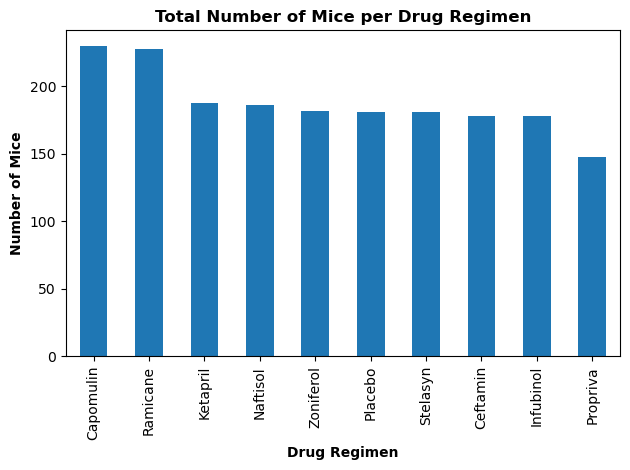

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar', width=0.5)

# Set x/y label, title
pd_bar_mice_per_regimen.set_title(label="Total Number of Mice per Drug Regimen", fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel("Drug Regimen", fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel("Number of Mice", fontweight = 'bold')

# Save bar chart in pandas
plt.tight_layout()
pd_bar_mice_per_regimen.figure.savefig('pd_bar_mice_per_regimen.png')

# Present the bar chart
plt.show()



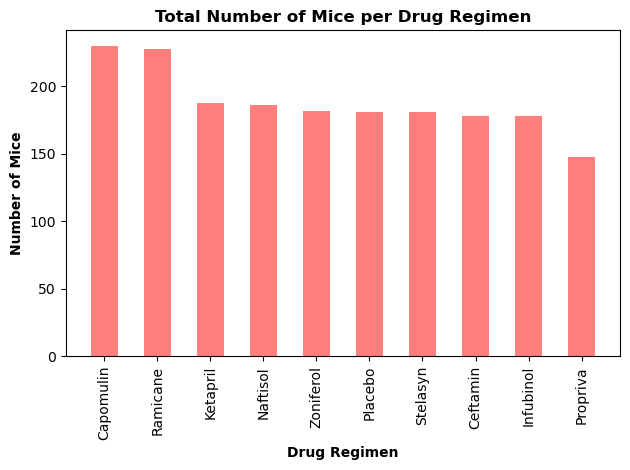

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
import matplotlib.pyplot as plt
x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)

# Create bar chart using pyplot, dependencies loaded above
bar_mice_per_regimen = plt.bar(x_axis_regimen, no_mice_per_regimen, color='red', alpha=0.5, width=0.5)

# Set x/y label, title - different colour used to show different methods
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title("Total Number of Mice per Drug Regimen", fontweight = 'bold')
plt.xlabel("Drug Regimen", fontweight = 'bold')
plt.ylabel("Number of Mice", fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
plt.savefig("bar_mice_per_regimen.png")

# Present the bar chart
plt.show()


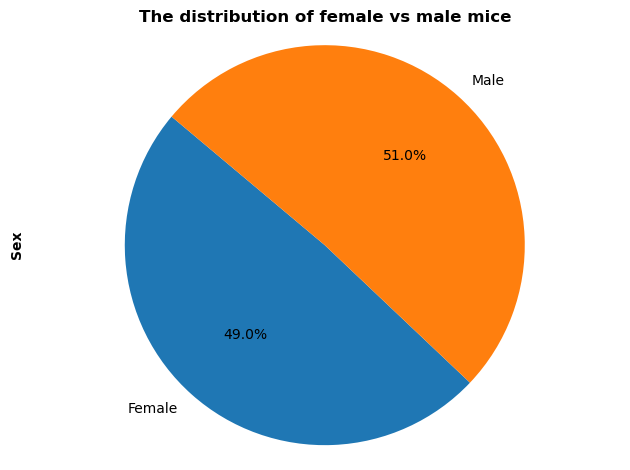

In [37]:
# Calculate number of mice for each sex
sex_mice = no_duplicate_data.groupby('Sex')['Sex'].count()
sex_mice

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
pd_pie_mice_sex.set_title(label="The distribution of female vs male mice", fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pd_pie_mice_sex.figure.savefig("pd_pie_mice_sex.png")

# Present the bar chart
plt.show()



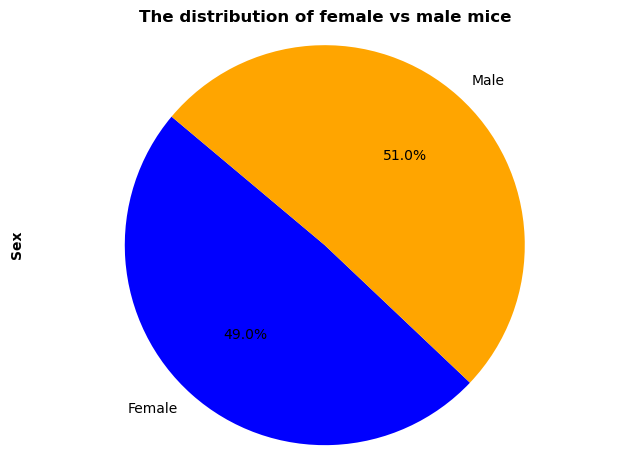

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Set x_axis and colors
sex = sex_mice.index
colors = ['blue','orange']

# Create pie chart
py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title("The distribution of female vs male mice", fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')

# Save an image of pie chart
plt.tight_layout()
plt.savefig('py_pie_mice_sex.png')

# Present the bar chart
plt.show()


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol = no_duplicate_data.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()




In [41]:
# Put treatments into a list for for loop 
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR 
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')
   
  
    

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

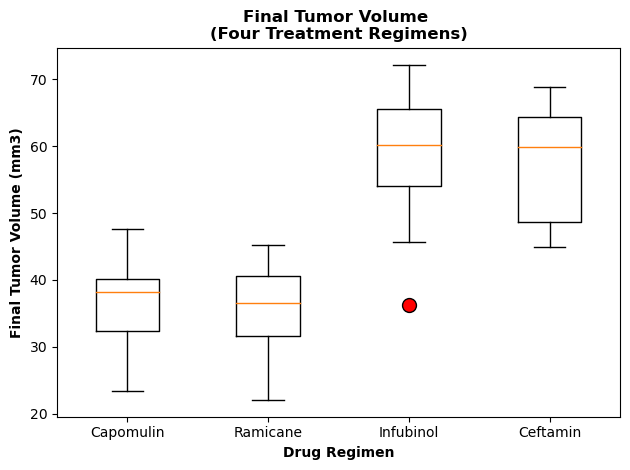

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Used https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/ for this section. 
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10}) #outliers will be red circle

# Set x/y label, title
final_tumor_plot.set_title("Final Tumor Volume \n(Four Treatment Regimens)", fontweight='bold')
final_tumor_plot.set_xlabel("Drug Regimen", fontweight='bold')
final_tumor_plot.set_ylabel("Final Tumor Volume (mm3)", fontweight='bold')

# Save box plot graph 
plt.tight_layout()
final_tumor_plot.figure.savefig("final_tumor_boxplot.png")

# Present the box plot chart
plt.show()


## Line and Scatter Plots

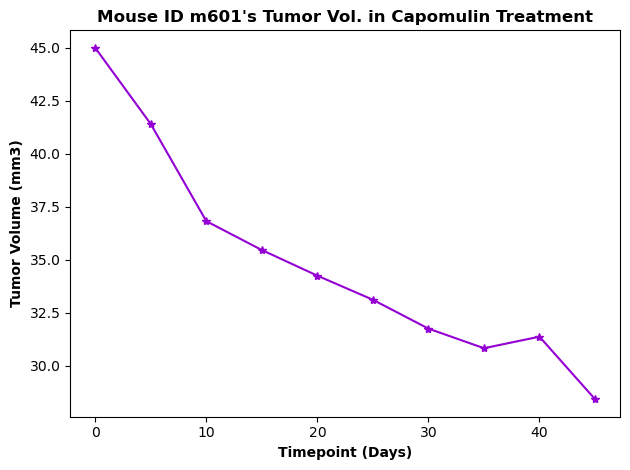

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = no_duplicate_data.loc[no_duplicate_data["Drug Regimen"] == "Capomulin"]
mouse_id = 'm601' # this mouse id was treated with Capomulin
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='darkviolet')

plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel("Timepoint (Days)", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontweight='bold')
plt.tight_layout()
plt.savefig("tumor_plot.png")

C:\Users\Kirsty Armstrong\AppData\Local\Temp\ipykernel_14936\1495083881.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_gp = Capomulin_df.groupby("Mouse ID").mean()


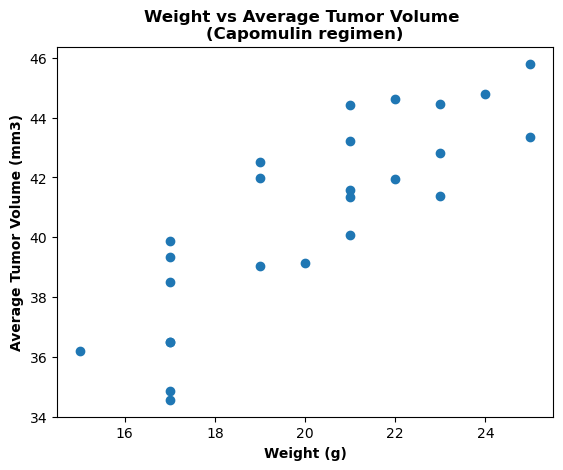

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_gp = Capomulin_df.groupby("Mouse ID").mean()
mice_weight_avg = Capomulin_gp["Weight (g)"]
mice_tumor_avg = Capomulin_gp["Tumor Volume (mm3)"]
plt.scatter(mice_weight_avg, mice_tumor_avg)
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight='bold')
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.savefig("scatter_weight_tumor.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


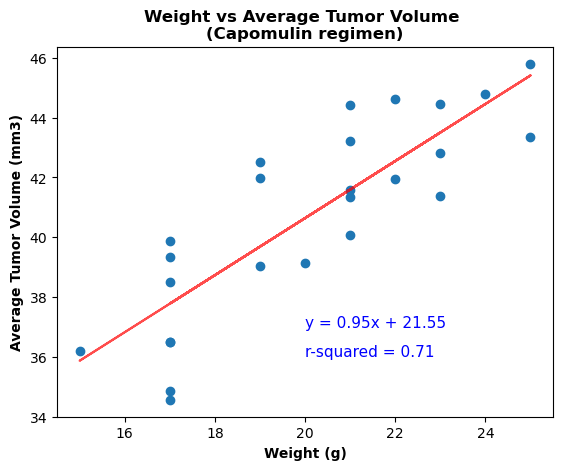

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mice_weight_avg
y_values = mice_tumor_avg
correlation = round(st.pearsonr(x_values, y_values)[0],2) #correlation using Pearson r
print(f"The correlation between mouse weight and tumor vol is {correlation}")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared - proportion of variance 
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="blue")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="blue")

# Define title and x/y labels
plt.title("Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight='bold')
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')

# Save box plot graph to Images folder
plt.savefig("scatter_weight_tumor_linear.png")

# Present the box plot chart
plt.show()